# 근속기간
### &Rightarrow; 1년 미만 근속기간과 3년이상 근속기간 비교

In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

## ✍근속기간 데이터 EDA

In [ ]:
# 근속기간
c_employment = pd.read_excel("data/근로형태별 평균근속기간 및 근속기간별 구성비.xlsx")

In [4]:
c_employment

,근로형태별,2015.03,2015.03.1,2015.03.2,2015.03.3,2015.03.4,2015.08,2015.08.1,2015.08.2,2015.08.3,...,2023.08,2023.08.1,2023.08.2,2023.08.3,2023.08.4,2024.08,2024.08.1,2024.08.2,2024.08.3,2024.08.4
0,근로형태별,평균근속기간,평균근속기간 증감(전년동월),1년미만,1~3년 미만,3년 이상,평균근속기간,평균근속기간 증감(전년동월),1년미만,1~3년 미만,...,평균근속기간,평균근속기간 증감(전년동월),1년미만,1~3년 미만,3년 이상,평균근속기간,평균근속기간 증감(전년동월),1년미만,1~3년 미만,3년 이상
1,임금근로자,69,1,30.6,22,47.3,68,1,32.4,20.9,...,74,1,30.3,21.2,48.5,76,3,29.1,21.4,49.6
2,정규직,87,2,20.6,21.5,57.9,88,2,20.7,21.1,...,98,1,16.7,20.9,62.4,103,5,15.1,20.5,64.4
3,비정규직,29,-2,52.1,23.2,24.7,28,-2,56.8,20.5,...,32,2,53.3,21.8,25,34,2,51.6,22.7,25.7
4,한시적,31,-3,45.3,27.6,27.1,29,-2,51.5,24.1,...,30,0,53.2,23,23.8,30,0,53,24.6,22.4
5,기간제,30,-2,45.7,27.5,26.8,29,-1,51.6,24.2,...,30,0,53,23.1,23.9,31,1,52.8,24,23.2
6,비기간제,36,-7,44,28.2,27.8,31,-8,51.2,23.6,...,26,0,55.7,22,22.2,21,-5,54.8,29.2,15.9
7,시간제,20,1,63,21,15.9,19,1,68.9,17.3,...,26,3,61,19.5,19.5,28,2,58.9,20.2,20.9
8,비전형,30,-2,58.2,17.3,24.5,29,-2,59.9,16.3,...,37,3,54.6,16.9,28.5,41,5,51.9,17,31.1


In [5]:
c_employment.columns # 컬럼확인

Index(['근로형태별', '2015.03', '2015.03.1', '2015.03.2', '2015.03.3', '2015.03.4',
       '2015.08', '2015.08.1', '2015.08.2', '2015.08.3', '2015.08.4',
       '2016.03', '2016.03.1', '2016.03.2', '2016.03.3', '2016.03.4',
       '2016.08', '2016.08.1', '2016.08.2', '2016.08.3', '2016.08.4',
       '2017.08', '2017.08.1', '2017.08.2', '2017.08.3', '2017.08.4',
       '2018.08', '2018.08.1', '2018.08.2', '2018.08.3', '2018.08.4',
       '2019.08', '2019.08.1', '2019.08.2', '2019.08.3', '2019.08.4',
       '2020.08', '2020.08.1', '2020.08.2', '2020.08.3', '2020.08.4',
       '2021.08', '2021.08.1', '2021.08.2', '2021.08.3', '2021.08.4',
       '2022.08', '2022.08.1', '2022.08.2', '2022.08.3', '2022.08.4',
       '2023.08', '2023.08.1', '2023.08.2', '2023.08.3', '2023.08.4',
       '2024.08', '2024.08.1', '2024.08.2', '2024.08.3', '2024.08.4'],
      dtype='object')

In [15]:
# 2017.08.2 ~ 2024.08.2 : 1년 미만
# 2017.08.4 ~ 2024.08.4 : 3년 이상

cols_1 = [] # 1년 미만(XXXX.XX.02) 리스트 저장 => 컬럼으로 쓸 예정
col_13 = []
cols_3 = [] # 3년 이상(XXXX.XX.04) 리스트 저장 => 컬럼으로 쓸 예정

# 2017~2024 1년 미만과 3년 이상 컬럼명 저장
for i in range(2017, 2025):
    cols_1.append(f'{i}.08.2')
    col_13.append(f'{i}.08.3')
    cols_3.append(f'{i}.08.4')

ce1 = c_employment[cols_1]
ce13 = c_employment[col_13]
ce3 = c_employment[cols_3]

In [ ]:
# 임금근로자 행 빼고 다 날림
c_employment_1 = ce1.iloc[1:2]
c_employment_13 = ce13.iloc[1:2]
c_employment_3 = ce3.iloc[1:2]

c_employment_1['기간'] = '1년 미만'
c_employment_13['기간'] = '1년 이상 3년 미만'
c_employment_3['기간'] = '3년 이상'


# 년도 뒤에 있는 .08.02, .08.03, .08.04 제거
c_employment_1.columns = c_employment_1.columns.str.replace('.08.2', '')
c_employment_13.columns = c_employment_13.columns.str.replace('.08.3', '')
c_employment_3.columns = c_employment_3.columns.str.replace('.08.4', '')

# 세가지 리스트를 하나의 데이터프레임으로 합치기
c_employment_all = pd.concat([c_employment_1, c_employment_13, c_employment_3], ignore_index=True)
c_employment_all

df_melted = c_employment_all.melt(id_vars="기간", var_name="연도", value_name="비율")
df_melted

# # 데이터프레임을 csv파일로 저장
df_melted.to_csv('data/근속기간.csv', index=False)


---

## 🎨시각화

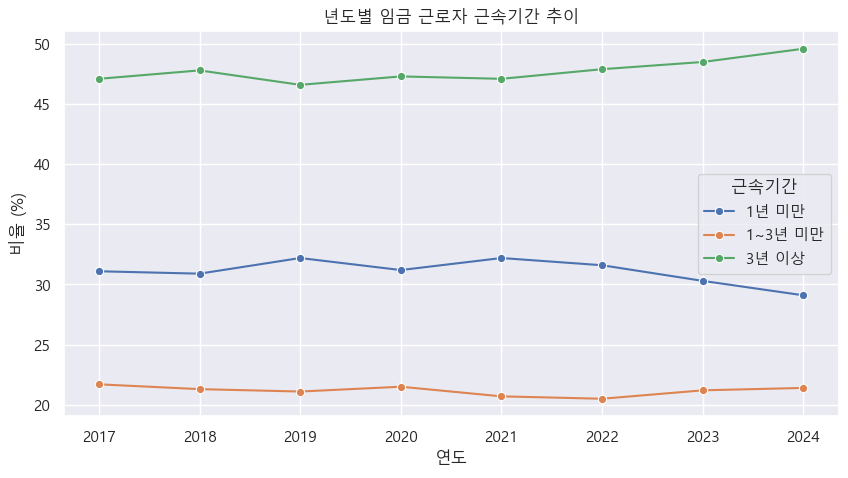

In [13]:
years = [] # 연도 리스트 저장
for i in c_employment_1.columns:
    years.append(i.split('.')[0]) # 연도 추출

# 데이터프레임 생성하여 시각화
plot_df = pd.DataFrame({
    '연도': years,
    '1년 미만': c_employment_1.iloc[0].values,
    '1~3년 미만' : c_employment_13.iloc[0].values,
    '3년 이상': c_employment_3.iloc[0].values
})

plot_df = plot_df.melt(id_vars='연도', var_name='근속기간', value_name='비율')

# 선그래프
sns.lineplot(data=plot_df, x='연도', y='비율', hue='근속기간', marker='o')
plt.title('년도별 임금 근로자 근속기간 추이')
plt.xlabel('연도')
plt.ylabel('비율 (%)')
plt.grid(True)
plt.legend(title='근속기간')
plt.show()

&Downarrow; 
<br> 임금근로자
<br> 1년 미만 근무자가 줄어들고, 3년 이상 근무자가 늘어나고 있음